<a href="https://colab.research.google.com/github/rs-ravi2/DS/blob/main/Grad_desc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
housing_data = pd.read_csv('/content/drive/MyDrive/Colab Data/HousingData.csv')

In [31]:
housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [32]:
data = housing_data.dropna()

In [33]:
X = data.iloc[:, 4:8].values
y = data.iloc[:, -1].values

In [34]:
X

array([[ 0.538 ,  6.575 , 65.2   ,  4.09  ],
       [ 0.469 ,  6.421 , 78.9   ,  4.9671],
       [ 0.469 ,  7.185 , 61.1   ,  4.9671],
       ...,
       [ 0.573 ,  6.12  , 76.7   ,  2.2875],
       [ 0.573 ,  6.976 , 91.    ,  2.1675],
       [ 0.573 ,  6.794 , 89.3   ,  2.3889]])

In [35]:
X = np.c_[np.ones(X.shape[0]), X]

In [36]:
# Parameters required for Gradient Descent
alpha = 0.0001   #learning rate
itr = 1000 #no_of_iterations
m = y.size  #no. of data points
np.random.seed(10)
beta = np.random.rand(5)  #initializing beta with some random values
batch_size = 25

In [37]:
beta

array([0.77132064, 0.02075195, 0.63364823, 0.74880388, 0.49850701])

In [38]:
print(X.shape)
print(beta.shape)
print(y.shape)

(394, 5)
(5,)
(394,)


In [39]:
def gradient_descent(x, y, batch_size, itr, beta, alpha):
    batch_count = m//batch_size #no_of_batches
    n = X.shape[1]
    loss_list = []   #to record all loss values to this list
    beta_list = []  #to record all beta_0 and beta_1 values to this list 
    prediction_list = []
    for i in range(0,itr):
        loss_batch_list = []
        prediction_batch_list = []
        beta_batch_list = []
        for k in range(1, batch_count):
            indx =  list(np.random.randint(0,m,int(batch_size)))
            X_batch = X[np.ix_(indx, )] 
            Y_batch = y[np.ix_(indx)]
            y_pred_batch = np.dot(X_batch, beta)
            prediction_batch_list.append(y_pred_batch)
            loss = np.sqrt(((Y_batch-y_pred_batch)**2).mean()) #RMSE
            loss_batch_list.append(loss)
            beta[0] = beta[0] - alpha * ((-2/m)*sum(Y_batch - y_pred_batch))

            for j in range(1, n):
                beta[j] = beta[j] - alpha * ((-2/m)*sum(X_batch[:,j]*(Y_batch - y_pred_batch)))

            beta_batch_list.append(beta)

        loss_list.append(loss_batch_list[-1])
        prediction_list.append(prediction_batch_list[-1])
        beta_list.append(beta_batch_list[-1])

    return prediction_list, loss_list, beta_list

In [40]:
y_pred_list, loss_list, beta_list = gradient_descent(X,y,batch_size,itr,beta,alpha)

In [41]:
beta = beta_list[-1]
print(beta)

[ 0.96874315  0.07318152  2.51327546 -0.00307889  1.50992469]


In [42]:
min(loss_list)

3.5901489368129385

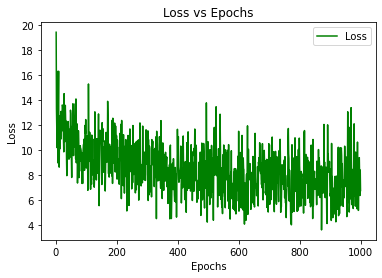

In [43]:
epochs = range(1,itr+1)
plt.plot(epochs, loss_list, 'g', label='Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Comparing

In [65]:
y_pred_final = y_pred_list[-1]

In [66]:
# RMSE_GD = ((y_pred_final-y)**2).mean() 

In [67]:
beta = beta_list[-1]
yp = beta[0] + beta[1]*X[:,1] + beta[2]*X[:,2] + beta[3]*X[:,3] + beta[4]*X[:,4]
MSE_equ = ((yp-y)**2).mean()

In [68]:
print('Mean Square Error using equation of hyperplane : {}'.format(round(MSE_equ,3)))
# print('Mean Square Error from Gradient Descent prediction : {}'.format(round(MSE_GD,3)))

Mean Square Error using equation of hyperplane : 59.445


Using sci-kit learn

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=123)

In [71]:
X_test.shape

(131, 5)

In [72]:
y_train.shape

(263,)

In [73]:
lm = LinearRegression()

#Fitting the model
lm = lm.fit(X_train,y_train)

#predicting
pred = lm.predict(X_test)

In [74]:
pred.shape

(131,)

In [75]:
Loss = np.sqrt(((pred-y_test)**2).mean())
print(Loss)

5.7735643516967805


In [76]:
intercept = lm.intercept_
Beta_0 = lm.coef_[0]
Beta_1 = lm.coef_[1]
Beta_2 = lm.coef_[2]
Beta_3 = lm.coef_[3]
Beta_4 = lm.coef_[4]

print("FROM LR MODEL")

print('Intercept : {}'.format(round(intercept,3)))
print('Beta_0 : {}'.format(round(Beta_0,4)))
print('Beta_1 : {}'.format(round(Beta_1,4)))
print('Beta_2 : {}'.format(round(Beta_2,4)))
print('Beta_3 : {}'.format(round(Beta_3,4)))
print('Beta_4 : {}'.format(round(Beta_4,4)))

FROM LR MODEL
Intercept : -8.057
Beta_0 : 0.0
Beta_1 : -21.029
Beta_2 : 8.5254
Beta_3 : -0.091
Beta_4 : -1.3779


In [77]:
print("FROM Gradient Descent from Scratch")
print('Intercept : {}'.format(round(beta[0],3)))
print('beta_0 : {}'.format(round(beta[1],4)))
print('beta_1 : {}'.format(round(beta[2],4)))
print('beta_2 : {}'.format(round(beta[3],4)))
print('beta_3 : {}'.format(round(beta[4],4)))
# print('beta_4 : {}'.format(round(beta[5],4)))

FROM Gradient Descent from Scratch
Intercept : 0.969
beta_0 : 0.0732
beta_1 : 2.5133
beta_2 : -0.0031
beta_3 : 1.5099


Graphs

In [36]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
from matplotlib.animation import FuncAnimation, PillowWriter 


# Create a figure and a 3D Axes
fig = plt.figure(figsize=(12,10))
ax = Axes3D(fig)
ax.set_xlabel('X', fontsize = 15)
ax.set_ylabel('Y', fontsize = 15)
ax.set_zlabel('Z', fontsize = 15)

plt.close()

In [ ]:
def init():
    ax.scatter(X_test[:,0], X_test[:,1], y_test, c='C6', marker='o', alpha=0.6) 
    x0, x1, x2, x3, x4 = np.meshgrid(X_test[:,0], X_test[:,1], X_test[:,2], X_test[:,3],X_test[:,4])
    yp = Beta_0 * x0 + Beta_1 * x1 + Beta_2 * x2 + Beta_3 * x3+ Beta_4 * x4
    ax.plot_wireframe(x0,x1,yp, rcount=200,ccount=200, linewidth = 0.5,color='C9', alpha=0.5)
    ax.legend(fontsize=15, labels = ['Data points', 'Hyperplane'])
    return fig,

def animate(i):
    ax.view_init(elev=10., azim=i)
    return fig,


# Animate

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)

# plt.legend(fontsize=15, labels = [''])
anim.save('animation.gif', writer='pillow', fps = 30)
plt.close()

In [ ]:
import io
import base64
from IPython.display import HTML

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

In [ ]:
# # We'll see how this looks in 2D view

# # Function for getting the 2D view

# def plot_view(elev_given, azim_given):

#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')

#     #Scatter plot
#     ax.scatter(xs[:,0], xs[:,1], ys, c='C6', marker='o', alpha=0.6, label='Data points')

#     #Plane 

#     x0, x1 = np.meshgrid(xs[:,0], xs[:,1])
#     yp = Beta_0 * x0 + Beta_1 * x1
#     ax.plot_wireframe(x0,x1,yp, rcount=200,ccount=200, linewidth = 0.5, color='C9', alpha=0.5, label='Hyperplane')

#     ax.set_xlabel('Rooms', fontsize = 15)
#     ax.set_ylabel('Population', fontsize = 15)
#     ax.set_zlabel('Price', fontsize = 15)
#     plt.legend(fontsize=15)
#     ax.view_init(elev=elev_given, azim=azim_given)

In [ ]:
# plot_view(-23,91)
# plt.show()

In [ ]:
# plot_view(158,-172)
# plt.show()

Plotting:


In [17]:
def plot(itr, loss_list):
  epochs = range(1,itr+1)
  plt.plot(epochs, loss_list, 'g', label='Loss')
  plt.title('Loss vs Epochs')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

## Altering Parameters:



Obs - 1

In [21]:
print(X.shape)
print(beta.shape)
print(y.shape)

(394, 5)
(5,)
(394,)


In [45]:
m = y.size  #no. of data points
np.random.seed(10)
beta = np.random.rand(5)  #initializing beta with some random values
alpha2 = 0.0005
itr2 = 100
batch_size2 = 35
y_pred_list2, loss_list2, beta_list2 = gradient_descent(X,y,batch_size2,itr2,beta,alpha2)

In [48]:
len(loss_list2)

100

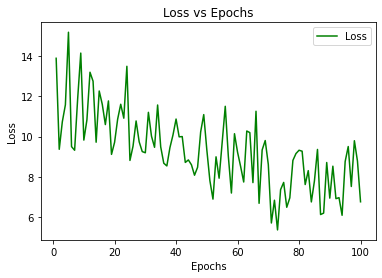

In [49]:
plot(itr2, loss_list2)

Obs - 2

In [60]:
m = y.size  #no. of data points
np.random.seed(10)
beta = np.random.rand(5)  #initializing beta with some random values
alpha3 = 0.00001
itr3 = 1000
batch_size3 = 20
y_pred_list3, loss_list3, beta_list3 = gradient_descent(X,y,batch_size3,itr3,beta,alpha3)

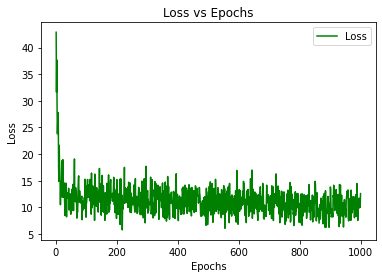

In [61]:
plot(itr3, loss_list3)

In [64]:
min(loss_list3)

5.766266885333015